In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
lfw = fetch_lfw_people(min_faces_per_person=100, resize=0.4)

In [4]:
img_height, img_width = lfw.images.shape[1:3]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(lfw.data, lfw.target, test_size=0.25, random_state=42)

In [6]:
def plot_gallery(images, hsize=20):
    plt.figure(figsize=(hsize, hsize))
    for i in range(hsize * hsize):
        plt.subplot(hsize, hsize, i + 1)
        plt.imshow(images[i], cmap=plt.cm.bone)
        plt.axis('off')

    plt.show()

In [7]:
def best_k(x, target_variance_ratio):
    pca = PCA()
    pca.fit(x)

    total_var = sum(pca.explained_variance_)
    k = 0
    variance = 0

    while k < len(pca.explained_variance_) and variance / total_var <= target_variance_ratio:
        variance += pca.explained_variance_[k]
        k += 1

    return k

In [8]:
def model_accuracy(model, x_test, y_test):
    y_pred = model.predict(x_test)
    print(model.best_params_)
    print(model.score(x_test, y_test))
    return y_pred

In [9]:
def print_report(y_true, y_pred):
    print(classification_report(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))

In [10]:
def grid_search(x, y, model, param_grid):
    gsvc = GridSearchCV(model, param_grid, cv=5)

    gsvc.fit(x, y)

    return gsvc

In [11]:
pca = PCA(n_components=best_k(x_train, target_variance_ratio=0.99))
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

x_train.shape, x_train_pca.shape

((855, 1850), (855, 356))

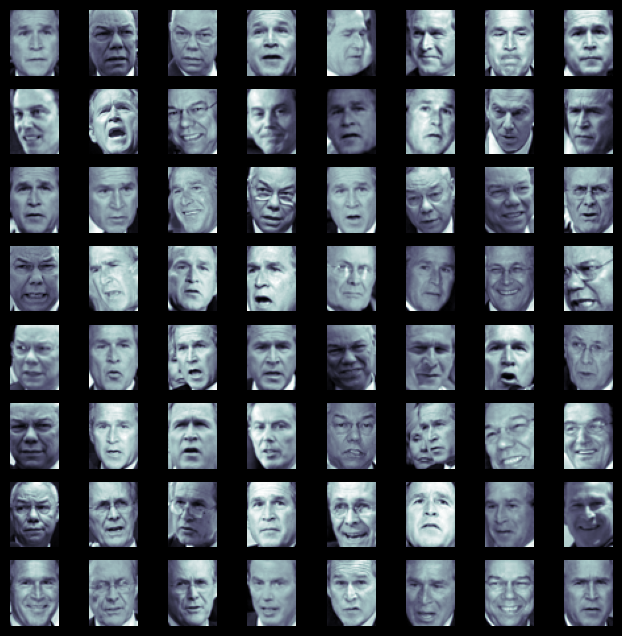

In [12]:
plot_gallery(x_train.reshape(x_train.shape[0], img_height, img_width), hsize=8)

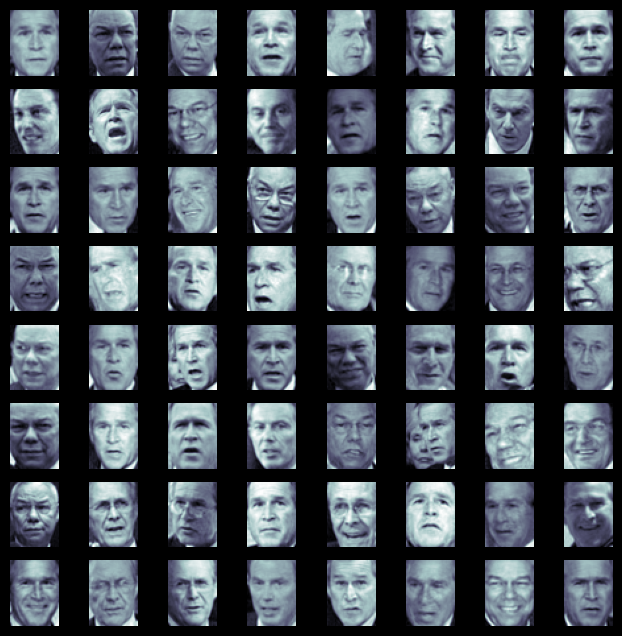

In [13]:
x_approx = pca.inverse_transform(x_train_pca)

plot_gallery(x_approx.reshape(x_approx.shape[0], img_height, img_width), hsize=8)

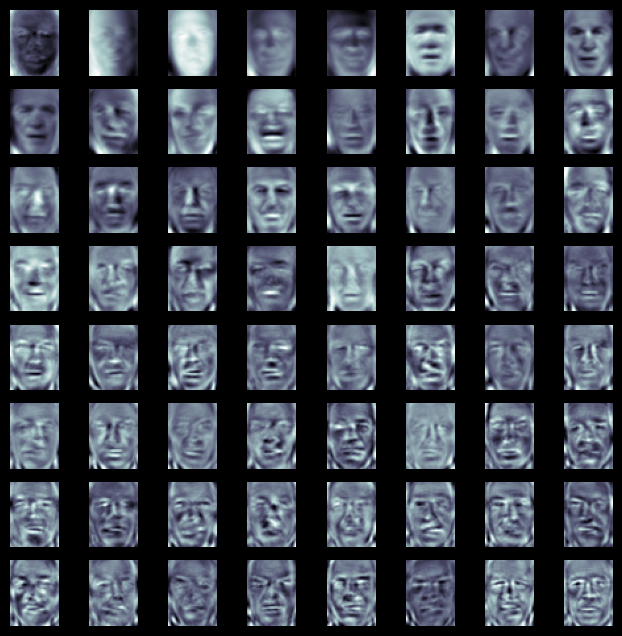

In [14]:
plot_gallery(pca.components_.reshape(pca.components_.shape[0], img_height, img_width), hsize=8)

In [15]:
param_grid = [
    {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
    {'kernel': ['rbf'], 'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 'scale', 'auto']}
]

svc = grid_search(x_train_pca, y_train, SVC(), param_grid)

In [16]:
svc_y_pred = model_accuracy(svc, x_test_pca, y_test)
print_report(y_test, svc_y_pred)

{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
0.8912280701754386
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        64
           1       0.90      0.84      0.87        32
           2       0.89      0.94      0.91       127
           3       0.89      0.86      0.88        29
           4       0.90      0.85      0.88        33

    accuracy                           0.89       285
   macro avg       0.89      0.87      0.88       285
weighted avg       0.89      0.89      0.89       285

[[ 55   2   6   0   1]
 [  0  27   4   1   0]
 [  5   1 119   1   1]
 [  1   0   2  25   1]
 [  1   0   3   1  28]]


In [17]:
param_grid = [
    {'n_neighbors': np.arange(1, 50, 2)}
]

knn = grid_search(x_train_pca, y_train, KNeighborsClassifier(), param_grid)

In [18]:
knn_y_pred = model_accuracy(knn, x_test_pca, y_test)
print_report(y_test, knn_y_pred)

{'n_neighbors': 5}
0.5859649122807018
              precision    recall  f1-score   support

           0       0.56      0.67      0.61        64
           1       0.45      0.31      0.37        32
           2       0.62      0.79      0.69       127
           3       0.46      0.21      0.29        29
           4       0.67      0.24      0.36        33

    accuracy                           0.59       285
   macro avg       0.55      0.44      0.46       285
weighted avg       0.58      0.59      0.56       285

[[ 43   6  13   0   2]
 [  7  10  14   0   1]
 [ 19   4 100   4   0]
 [  5   1  16   6   1]
 [  3   1  18   3   8]]


In [19]:
param_grid = [
    {'var_smoothing': np.logspace(0, -9, num=100)}
]

nb = grid_search(x_train_pca, y_train, GaussianNB(), param_grid)

In [20]:
nb_y_pred = model_accuracy(nb, x_test_pca, y_test)
print_report(y_test, nb_y_pred)

{'var_smoothing': 0.04328761281083057}
0.6140350877192983
              precision    recall  f1-score   support

           0       1.00      0.36      0.53        64
           1       0.91      0.31      0.47        32
           2       0.54      0.98      0.70       127
           3       0.82      0.31      0.45        29
           4       1.00      0.24      0.39        33

    accuracy                           0.61       285
   macro avg       0.85      0.44      0.51       285
weighted avg       0.77      0.61      0.57       285

[[ 23   0  41   0   0]
 [  0  10  21   1   0]
 [  0   1 125   1   0]
 [  0   0  20   9   0]
 [  0   0  25   0   8]]
